In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
mining_data = pd.read_csv('MiningProcess_Flotation_Plant_Database.csv', decimal=",", parse_dates=["date"],infer_datetime_format=True).drop_duplicates()
mining_data['date'] = pd.to_datetime(mining_data['date'])
mining_data.head(10)

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
5,2017-03-10 01:00:00,55.2,16.98,3079.10,564.697,396.533,10.0705,1.74,250.730,248.906,...,251.873,444.384,443.269,460.449,439.920,451.588,433.539,425.458,66.91,1.31
6,2017-03-10 01:00:00,55.2,16.98,3127.79,566.467,392.900,10.0713,1.74,250.313,252.202,...,253.477,446.185,444.571,452.306,431.328,443.548,444.575,431.251,66.91,1.31
7,2017-03-10 01:00:00,55.2,16.98,3152.93,558.777,397.002,10.0722,1.74,249.895,253.630,...,253.345,445.985,461.341,461.640,442.067,441.730,461.770,449.679,66.91,1.31
8,2017-03-10 01:00:00,55.2,16.98,3147.27,556.030,394.307,10.0730,1.74,250.137,251.104,...,250.884,446.686,478.385,459.103,455.074,439.798,457.738,455.915,66.91,1.31
9,2017-03-10 01:00:00,55.2,16.98,3142.58,565.857,393.105,10.0738,1.74,249.653,252.202,...,248.137,445.685,478.779,460.665,457.225,453.236,449.898,455.750,66.91,1.31


In [22]:
mining_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 736282 entries, 0 to 737452
Data columns (total 24 columns):
date                            736282 non-null datetime64[ns]
% Iron Feed                     736282 non-null float64
% Silica Feed                   736282 non-null float64
Starch Flow                     736282 non-null float64
Amina Flow                      736282 non-null float64
Ore Pulp Flow                   736282 non-null float64
Ore Pulp pH                     736282 non-null float64
Ore Pulp Density                736282 non-null float64
Flotation Column 01 Air Flow    736282 non-null float64
Flotation Column 02 Air Flow    736282 non-null float64
Flotation Column 03 Air Flow    736282 non-null float64
Flotation Column 04 Air Flow    736282 non-null float64
Flotation Column 05 Air Flow    736282 non-null float64
Flotation Column 06 Air Flow    736282 non-null float64
Flotation Column 07 Air Flow    736282 non-null float64
Flotation Column 01 Level       736282 non

In [17]:
# new_data = new_data.drop(['date', '% Iron Concentrate', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow'], axis=1)
# new_data.drop(new_data.columns[new_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
# new_data.to_csv('test.csv')

In [23]:
mining_data.describe()

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,...,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,9.767315,1.680424,280.119813,277.121249,281.052538,...,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,65.049096,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.387176,0.069206,29.633831,30.157126,28.571077,...,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.118721,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,8.753340,1.519820,175.510000,175.156000,176.469000,...,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,62.050000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,9.527050,1.647390,250.278000,250.448000,250.847000,...,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,64.370000,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,9.797460,1.697580,299.341000,296.202000,298.690000,...,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,65.210000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,10.037800,1.728380,300.147000,300.686000,300.385000,...,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,65.860000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,10.808100,1.853250,373.871000,375.992000,364.346000,...,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,68.010000,5.530000


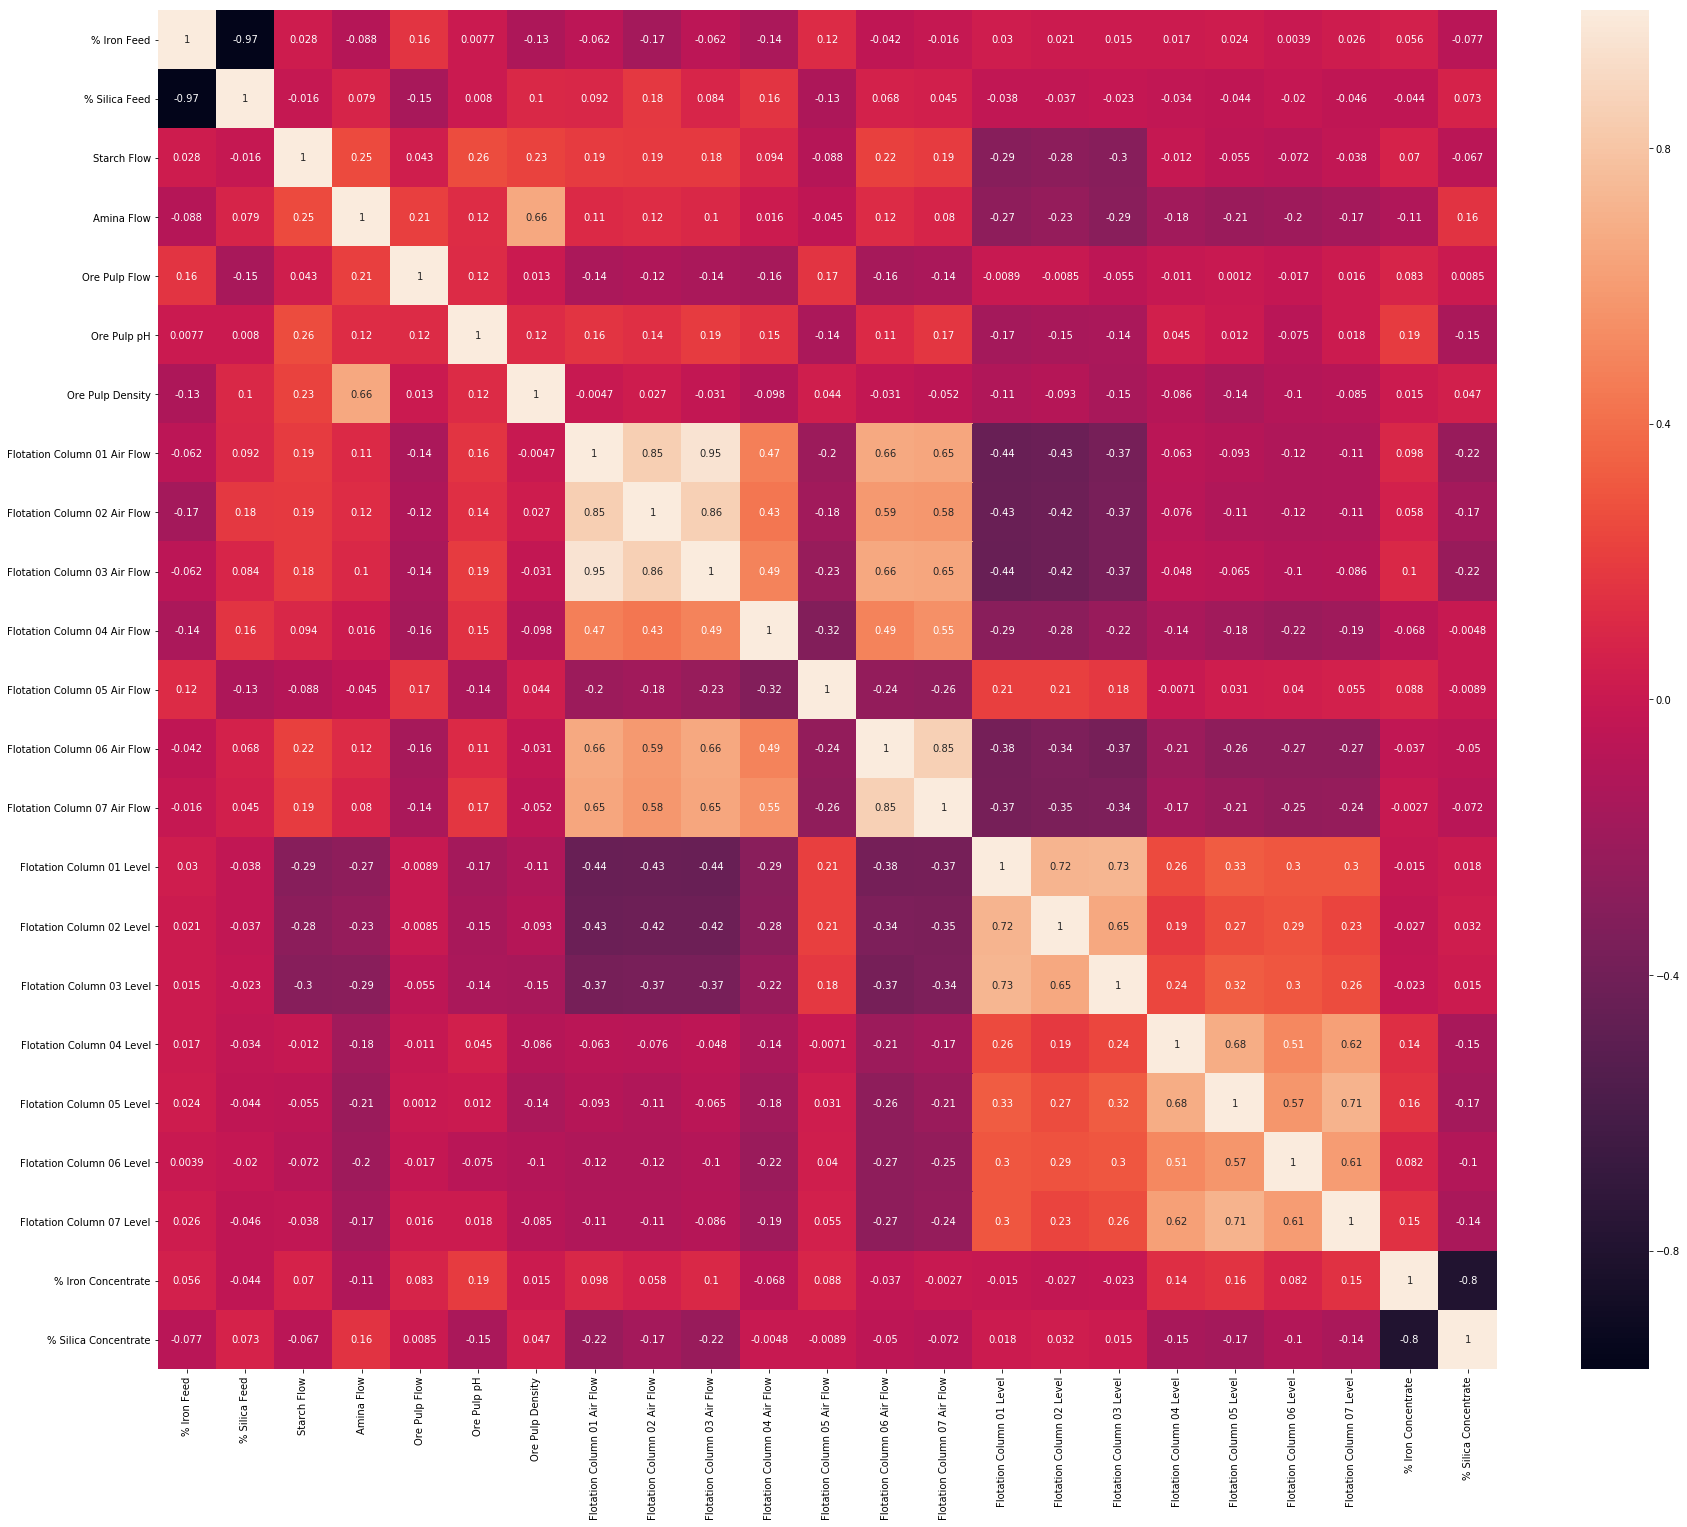

In [27]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(mining_data.corr(), annot=True)

In [29]:
mining_data.drop(['date','% Iron Concentrate', 'Ore Pulp pH', 'Flotation Column 01 Air Flow', 'Flotation Column 02 Air Flow', 'Flotation Column 03 Air Flow'],axis=1, inplace=True)
mining_data.head(10)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp Density,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,1.74,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,1.31
1,55.2,16.98,3024.41,563.965,397.383,1.74,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,1.31
2,55.2,16.98,3043.46,568.054,399.668,1.74,295.096,306.4,251.345,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,1.31
3,55.2,16.98,3047.36,568.665,397.939,1.74,295.096,306.4,250.422,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,1.31
4,55.2,16.98,3033.69,558.167,400.254,1.74,295.096,306.4,249.983,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,1.31
5,55.2,16.98,3079.10,564.697,396.533,1.74,295.096,306.4,250.356,251.873,444.384,443.269,460.449,439.920,451.588,433.539,425.458,1.31
6,55.2,16.98,3127.79,566.467,392.900,1.74,295.096,306.4,250.950,253.477,446.185,444.571,452.306,431.328,443.548,444.575,431.251,1.31
7,55.2,16.98,3152.93,558.777,397.002,1.74,295.096,306.4,249.456,253.345,445.985,461.341,461.640,442.067,441.730,461.770,449.679,1.31
8,55.2,16.98,3147.27,556.030,394.307,1.74,295.096,306.4,248.577,250.884,446.686,478.385,459.103,455.074,439.798,457.738,455.915,1.31
9,55.2,16.98,3142.58,565.857,393.105,1.74,295.096,306.4,248.511,248.137,445.685,478.779,460.665,457.225,453.236,449.898,455.750,1.31


In [33]:
mining_data.to_csv('test1.csv')

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp Density,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Silica Concentrate
count,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.000000,736282.00000,736282.000000,736282.000000,736282.000000
mean,56.298307,14.648984,2869.636615,488.165523,397.570736,1.680424,299.446217,299.914815,292.065742,290.740507,520.168402,522.555279,531.283790,420.169753,425.09453,429.889517,420.910258,2.327270
std,5.160365,6.810741,1216.017896,91.254428,9.705444,0.069206,2.573805,3.637020,30.241329,28.690520,131.085819,128.216232,150.931865,91.755819,84.47917,89.919586,84.899167,1.125616
min,42.740000,1.310000,0.002026,241.669000,376.249000,1.519820,292.195000,286.295000,189.928000,185.962000,149.218000,210.752000,126.255000,162.201000,166.99100,155.841000,175.349000,0.600000
25%,52.670000,8.940000,2075.070000,431.835848,394.248000,1.647390,298.257000,298.069000,260.299750,256.047750,416.902000,441.835250,411.256000,356.627000,357.59525,358.438000,356.705250,1.440000
50%,56.080000,13.850000,3020.230000,504.352500,399.238000,1.697580,299.804000,299.886000,299.486000,299.002000,491.749000,495.853500,494.184000,411.770500,408.65000,424.427000,410.940000,2.000000
75%,59.720000,19.600000,3728.930000,553.335750,402.967000,1.728380,300.635000,301.785000,303.077000,301.907000,594.097750,595.293000,601.299000,485.285000,484.00800,492.773000,476.145000,3.010000
max,65.780000,33.400000,6300.230000,739.538000,418.641000,1.853250,305.871000,310.270000,370.910000,371.593000,862.274000,828.919000,886.822000,680.359000,675.64400,698.861000,659.902000,5.530000
